In [3]:
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv('data/train.csv', parse_dates=['datetime'])
test = pd.read_csv('data/test.csv', parse_dates=['datetime'])
sub = pd.read_csv('data/sampleSubmission.csv')

train.shape, test.shape, sub.shape

((10886, 12), (6493, 9), (6493, 2))

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
new_tr = train.copy()   # 데이터 백업
new_test = test.copy()
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
## 더미변수, 파생변수 생성
new_tr['year'] = new_tr['datetime'].dt.year
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [8]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek

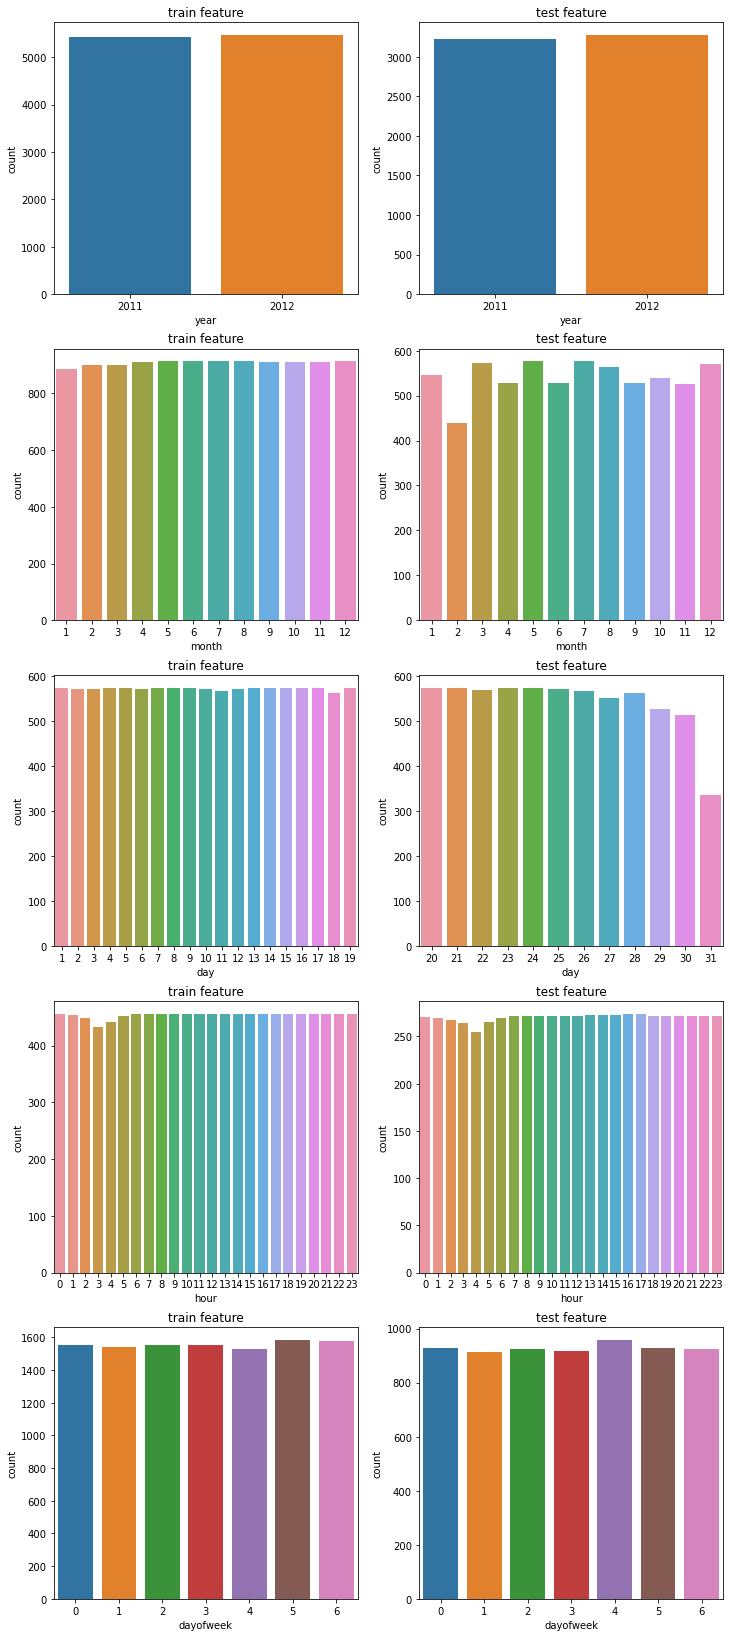

In [9]:
col_names = ['year','month','day','hour','dayofweek']
i = 0
plt.figure(figsize=(12,35))  ##전체 그래프 크기 지정

for name in col_names: ## 컬럼명으로 반복
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(x = name, data = new_tr)
  plt.title("train feature")
    
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(x = name, data = new_test)
  plt.title("test feature")
plt.show()

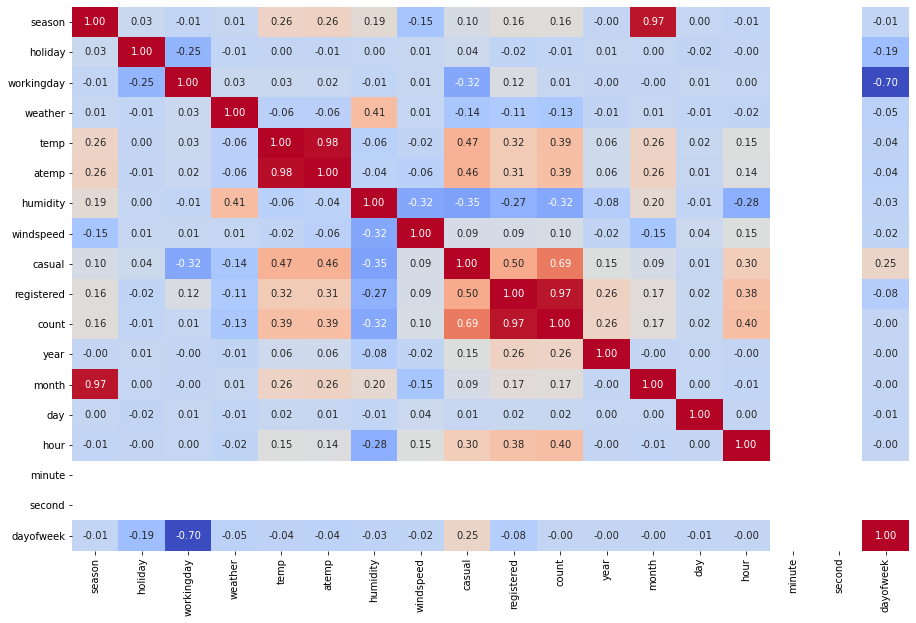

In [10]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

### 특성 선택 X, y, 테스트 데이터 셋에 대해 데이터 나누기.
* y에 대해 log_count 생성, 지정하기

In [11]:
new_tr['log_count'] = np.log1p(new_tr['count'])
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,log_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,0.693147


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 훈련, 테스트 셋 분할
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "hour", "dayofweek"]  # 공통 변수

X = new_tr[feature_names]
y = new_tr['log_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [14]:
# 최종 입력 값
X_test_last = new_test[feature_names]

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import time

In [16]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

# 교차 검증
scores = cross_val_score(model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

print('MSE 평균 :', np.abs(scores.mean()))

MSE 평균 : 0.23152639566380287


In [17]:
def model_val(model_name, model_obj):
    now_time = time.time() # 시작시간
    
    model_obj.fit(X_train, y_train)

    # 교차 검증
    scores = cross_val_score(model_obj, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
    avg_score = np.abs(scores.mean())
    print('MSE 평균 :', avg_score)
    
    pro_time = time.time() - now_time
    print('수행 시잔 : {0:.3f}'.format(pro_time))
    print("{} Score : {}".format(model_name, avg_score))
    
    return avg_score, pro_time

In [18]:
model_list = ["RandomForestRegressor",  "xgb_basic", 
              "lightgbm-model1", "lightgbm-model2"]

exe_model = []
model_score = []
model_time = []

In [19]:
# 랜덤 포레스트로 테스트
m_name = model_list[0]

if m_name not in exe_model:
    model = RandomForestRegressor(random_state=30)
    mse_score, p_time = model_val(m_name, model)
    
    exe_model.append(m_name) # 실행 완료
    model_score.append(mse_score)
    model_time.append(p_time)
else:
    print(f'{m_name} 이미 실행 완료')

MSE 평균 : 0.2262288404675356
수행 시잔 : 4.284
RandomForestRegressor Score : 0.2262288404675356


### 실습

In [29]:
# 2번째 

# xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
#                 colsample_bytree = 0.3, # 각나무마다 사용하는 feature 비율
#                 learning_rate = 0.1,
#                 max_depth = 3, 
#                 alpha = 0.1, 
#                 n_estimators = 1000)

# 3번째 
# m_lgbm1 = lgb.LGBMRegressor()
# 

# 4번째

# hyperparameters = {'boosting_type': 'gbdt', 
#                    'colsample_bytree': 0.7250136792694301, 
#                    'is_unbalance': False, 
#                    'learning_rate': 0.013227664889528229,
#                    'min_child_samples': 20, 
#                    'num_leaves': 56, 
#                    'reg_alpha': 0.7543896477745794, 
#                    'reg_lambda': 0.07152751159655985, 
#                    'subsample_for_bin': 240000, 
#                    'subsample': 0.5233384321711397, 
#                    'n_estimators': 2000}

# m_lgbm2 = lgb.LGBMRegressor(**hyperparameters)

In [21]:
# 2번째
m_name = model_list[1]

if m_name not in exe_model:
    model = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, # 각나무마다 사용하는 feature 비율
                learning_rate = 0.1,
                max_depth = 3, 
                alpha = 0.1, 
                n_estimators = 1000)
    mse_score, p_time = model_val(m_name, model)
    
    exe_model.append(m_name) # 실행 완료
    model_score.append(mse_score)
    model_time.append(p_time)
else:
    print(f'{m_name} 이미 실행 완료')

[18:55:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:18

In [22]:
# 3번째 
# m_lgbm1 = lgb.LGBMRegressor()
m_name = model_list[2]

if m_name not in exe_model:
    model = lgb.LGBMRegressor()
    mse_score, p_time = model_val(m_name, model)
    
    exe_model.append(m_name) # 실행 완료
    model_score.append(mse_score)
    model_time.append(p_time)
else:
    print(f'{m_name} 이미 실행 완료')

MSE 평균 : 0.17331310336511643
수행 시잔 : 0.512
lightgbm-model1 Score : 0.17331310336511643


In [23]:
# 4번째
m_name = model_list[3]

if m_name not in exe_model:
    hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7250136792694301, 
                   'is_unbalance': False, 
                   'learning_rate': 0.013227664889528229,
                   'min_child_samples': 20, 
                   'num_leaves': 56, 
                   'reg_alpha': 0.7543896477745794, 
                   'reg_lambda': 0.07152751159655985, 
                   'subsample_for_bin': 240000, 
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 2000}

    model = lgb.LGBMRegressor(**hyperparameters)
    mse_score, p_time = model_val(m_name, model)
    
    exe_model.append(m_name) # 실행 완료
    model_score.append(mse_score)
    model_time.append(p_time)
else:
    print(f'{m_name} 이미 실행 완료')

MSE 평균 : 0.17254501815636503
수행 시잔 : 8.398
lightgbm-model2 Score : 0.17254501815636503


In [24]:
print(exe_model)
print(model_score)
print(model_time)

['RandomForestRegressor', 'xgb_basic', 'lightgbm-model1', 'lightgbm-model2']
[0.2262288404675356, 0.19038612945644612, 0.17331310336511643, 0.17254501815636503]
[4.284050226211548, 6.716660737991333, 0.5123691558837891, 8.39757490158081]


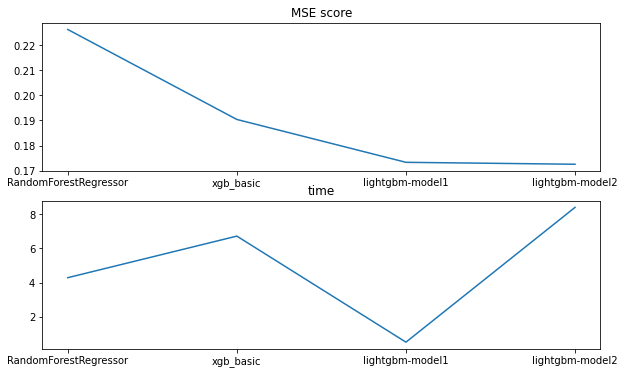

In [25]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.title('MSE score')
_ = sns.lineplot(x=exe_model, y=model_score)

plt.subplot(2,1,2)
plt.title('time')
_ = sns.lineplot(x=exe_model, y=model_time)

In [26]:
dict_dat={'model_name':exe_model, 'score':model_score, 'time':model_time}
dat = pd.DataFrame(dict_dat)
dat

,model_name,score,time
0,RandomForestRegressor,0.226229,4.284050
1,xgb_basic,0.190386,6.716661
2,lightgbm-model1,0.173313,0.512369
3,lightgbm-model2,0.172545,8.397575


<AxesSubplot:xlabel='time', ylabel='model_name'>

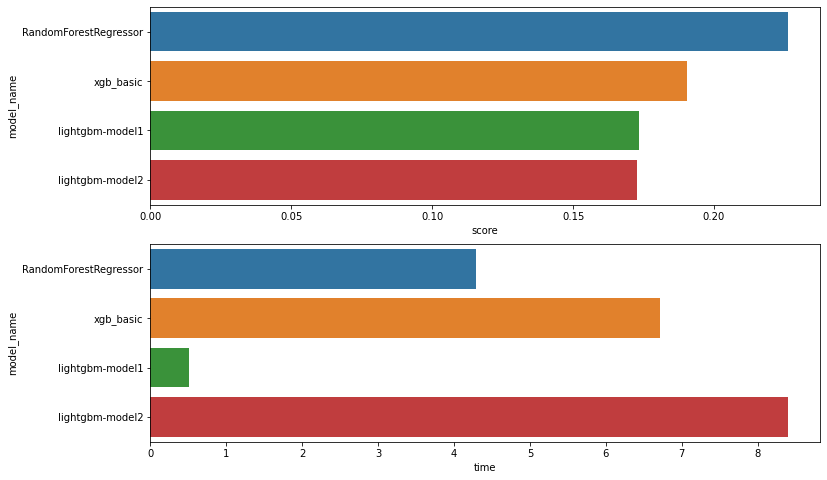

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.barplot(x='score', y='model_name', data=dat)

plt.subplot(2,1,2)
sns.barplot(x='time', y='model_name', data=dat)

In [28]:
hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7250136792694301, 
                   'is_unbalance': False, 
                   'learning_rate': 0.013227664889528229,
                   'min_child_samples': 20, 
                   'num_leaves': 56, 
                   'reg_alpha': 0.7543896477745794, 
                   'reg_lambda': 0.07152751159655985, 
                   'subsample_for_bin': 240000, 
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 2000}

# 최종 모델 선택 및 제출
m_lgbm2 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm2.fit(X_train, y_train)

pred = m_lgbm2.predict(X_test_last)
# y_train, y_test의 log_count( log(count+1) ) 값으로 예측했기에 expm1( e^(pred) -1 )해주어 count 값으로 돌려준다.
sub['count'] = np.expm1(pred)
sub.to_csv("sub_v04_lgbm_last.csv", index=False)